# Preprocessing, Feature selection, KNN - house dataset

## Preprocessing

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import learning_curve

In [5]:
data = pd.read_csv("data/houses.csv")
data = data[['GrLivArea','BedroomAbvGr','KitchenAbvGr', 'OverallCond','RoofSurface','GarageFinish','CentralAir','ChimneyStyle','MoSold','SalePrice']].copy()
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000


### Duplicates

In [6]:
data.duplicated().sum()

300

In [7]:
data.drop_duplicates(inplace=True)

### Missing data

In [8]:
data.isna().sum() / data.count()

GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
RoofSurface     0.006203
GarageFinish    0.058738
CentralAir      0.000000
ChimneyStyle    0.000000
MoSold          0.000000
SalePrice       0.000000
dtype: float64

GarageFinish

In [10]:
data['GarageFinish'].fillna('NA', inplace=True)

RoofSurface

In [12]:
imputer = SimpleImputer(strategy="median")
imputer.fit(data[['RoofSurface']])
data['RoofSurface'] = imputer.transform(data[['RoofSurface']])

In [13]:
data.isnull().sum() / data.count()

GrLivArea       0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
OverallCond     0.0
RoofSurface     0.0
GarageFinish    0.0
CentralAir      0.0
ChimneyStyle    0.0
MoSold          0.0
SalePrice       0.0
dtype: float64

### Not nan missing values

ChimneyStyle

In [14]:
data.drop(columns='ChimneyStyle', inplace=True)

### Scaling

RoofSurface

array([[<AxesSubplot:title={'center':'RoofSurface'}>]], dtype=object)

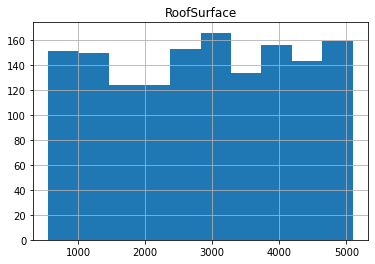

In [15]:
data[['RoofSurface']].hist()

<AxesSubplot:>

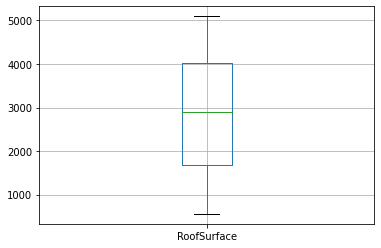

In [18]:
data[['RoofSurface']].boxplot()

In [19]:
scaler = MinMaxScaler()
scaler.fit(data[['RoofSurface']])
data['RoofSurface'] = scaler.transform(data[['RoofSurface']])

GrLivArea

<AxesSubplot:>

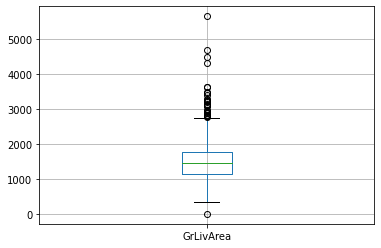

In [20]:
data[['GrLivArea']].boxplot()

array([[<AxesSubplot:title={'center':'GrLivArea'}>]], dtype=object)

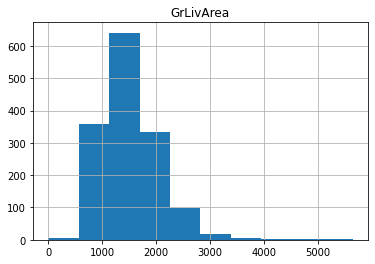

In [21]:
data[['GrLivArea']].hist()

In [24]:
r_scaler = RobustScaler() # Instanciate Robust Scaler
r_scaler.fit(data[['GrLivArea']]) # Fit scaler to feature
data['GrLivArea'] = r_scaler.transform(data[['GrLivArea']]) #Scale

BedroomAbvGr, OverallCond and KitchenAbvGr

/home/soutobias/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'KitchenAbvGr'}>, <AxesSubplot:>]],
      dtype=object)

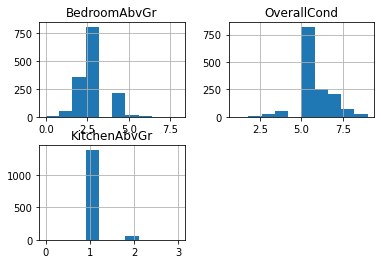

In [25]:
data[['BedroomAbvGr', 'OverallCond', 'KitchenAbvGr']].hist()

<AxesSubplot:>

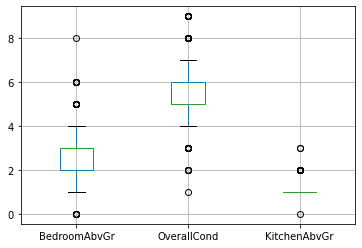

In [26]:
data[['BedroomAbvGr', 'OverallCond', 'KitchenAbvGr']].boxplot()

In [28]:
scaler = MinMaxScaler()
scaler.fit(data[['BedroomAbvGr', 'OverallCond', 'KitchenAbvGr']])
data['BedroomAbvGr'], data['OverallCond'], data['KitchenAbvGr'] = scaler.transform(data[['BedroomAbvGr', 'OverallCond', 'KitchenAbvGr']]).T

### Feature Engineering

GarageFinish

In [30]:
print(data.GarageFinish.unique())

ohe = OneHotEncoder(sparse = False)

ohe.fit(data[['GarageFinish']])

alley_encoded = ohe.transform(data[['GarageFinish']])
alley_encoded.T
data["Fin"],data["NA"],data['RFn'],data['Unf'] = alley_encoded.T
data.head()

['RFn' 'Unf' 'Fin' 'NA']


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice,Fin,NA,RFn,Unf
0,0.380070,0.375,0.333333,0.500,0.316729,RFn,Y,2,208500,0.0,0.0,1.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,RFn,Y,5,181500,0.0,0.0,1.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,RFn,Y,9,223500,0.0,0.0,1.0,0.0
3,0.390885,0.375,0.333333,0.500,0.442583,Unf,Y,2,140000,0.0,0.0,0.0,1.0
4,1.134029,0.500,0.333333,0.500,0.566894,RFn,Y,12,250000,0.0,0.0,1.0,0.0


In [31]:
data.drop(columns='GarageFinish', inplace=True)

CentralAir

In [33]:
print(data.CentralAir.unique())  # Check unique values for streets (3)
ohe = OrdinalEncoder()# Instanciate encoder
ohe.fit(data[['CentralAir']]) # Fit encoder
data['CentralAir'] = ohe.transform(data[['CentralAir']]) # Encode alley
data.head()

['Y' 'N']


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,Fin,NA,RFn,Unf
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,2,208500,0.0,0.0,1.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,5,181500,0.0,0.0,1.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,9,223500,0.0,0.0,1.0,0.0
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,2,140000,0.0,0.0,0.0,1.0
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,12,250000,0.0,0.0,1.0,0.0


MoSold - Cyclical engineering 

In [34]:
mo_sold_features = ['sin_time', 'cos_time']

In [35]:
months_in_year = 12

data['sin_time'] = np.sin(2*np.pi*data.MoSold/months_in_year)
data['cos_time'] = np.cos(2*np.pi*data.MoSold/months_in_year)

data.drop('MoSold', axis=1, inplace=True)

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Fin,NA,RFn,Unf,sin_time,cos_time
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,8.660254e-01,5.000000e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,5.000000e-01,-8.660254e-01
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-2.449294e-16,1.000000e+00


# Feature Selection

## Collinearity

<AxesSubplot:>

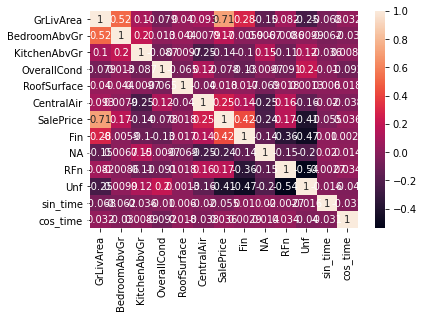

In [37]:
sns.heatmap(data.corr(), annot=True)

## Base Model

In [39]:
X = data.drop(columns='SalePrice')
y = data['SalePrice']

In [41]:
model = LinearRegression()
cv_results = cross_validate(model, X, y, cv=5)
cv_results['test_score'].mean()

0.641914406699805

## Feature Permutation

In [43]:
log_model = LogisticRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(log_model, X, y, n_repeats=30) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

,feature,score decrease
0,GrLivArea,0.017763
9,Unf,0.010251
11,cos_time,0.008037
5,CentralAir,0.006027
10,sin_time,0.005753
8,RFn,0.005753
6,Fin,0.005023
4,RoofSurface,0.003653
7,NA,0.002169
3,OverallCond,0.001941


## Reduce Model Complexity

In [67]:
X = data.drop(columns=['SalePrice', 'RoofSurface','NA', 'OverallCond','BedroomAbvGr','KitchenAbvGr'])
y = data['SalePrice']

In [68]:
model = LinearRegression()
cv_results = cross_validate(model, X, y, cv=5)

cv_results['test_score'].mean()

0.6084727659977115

# KNN

In [69]:
X.head()

,GrLivArea,CentralAir,Fin,RFn,Unf,sin_time,cos_time
0,0.380070,1.0,0.0,1.0,0.0,8.660254e-01,5.000000e-01
1,-0.312090,1.0,0.0,1.0,0.0,5.000000e-01,-8.660254e-01
2,0.497489,1.0,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16
3,0.390885,1.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01
4,1.134029,1.0,0.0,1.0,0.0,-2.449294e-16,1.000000e+00


In [70]:
model = KNeighborsRegressor()
cv_results = cross_validate(model, X, y, cv=5)
cv_results['test_score'].mean()

0.5877110372098027

## Scale sensitivity

In [71]:
scaler = MinMaxScaler()
scaler.fit(X)
X_rescaled= scaler.transform(X)

In [72]:
model = KNeighborsRegressor()
cv_results = cross_validate(model, X_rescaled, y, cv=5)
cv_results['test_score'].mean()

0.543738026684119

## Optimizing K

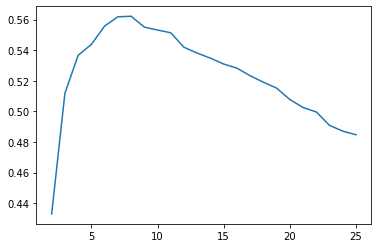

In [73]:
k = []
for i in range(2,26):
    model = KNeighborsRegressor(n_neighbors=i)
    cv_results = cross_validate(model, X_rescaled, y, cv=5)
    k.append(cv_results['test_score'].mean())

plt.plot(range(2,26), k)

In [74]:
k.index(max(k))

6

## Learning curves

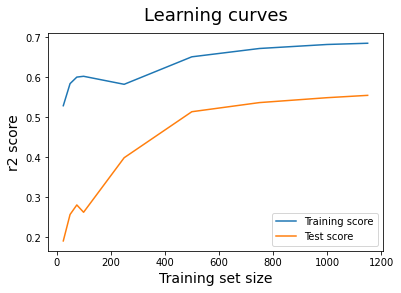

In [81]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=KNeighborsRegressor(n_neighbors=6), X=X_rescaled, y=y, train_sizes=train_sizes, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()